In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from scipy.ndimage import convolve

# Part 1 - Edge Detection

# Step 1:

In [2]:
#image1 = cv2.imread("image1.png")
image1 = cv2.imread("image1.png", cv2.IMREAD_GRAYSCALE)
#image1
image1 = image1.astype(np.float32) / 255.0

In [3]:
def gaussian_smoothing(size, sigma):
    grid_size = size //2
    x,y = np.mgrid[-grid_size:grid_size+1, -grid_size:grid_size+1]
    gaussi = (1/sigma*np.sqrt(2*np.pi))*(np.exp(-(np.square(x)+np.square(y))/(2*np.square(sigma))))
    #gaussi /= gaussi.sum()
    gaussi /= np.sum(np.abs(gaussi))
    #print(gaussi)
    return gaussi


In [4]:
def convolution(image, kernel):
    
    height, width = image.shape
    kernel_size = kernel.shape[0]
    kernel_radius = kernel_size // 2

    filtered_image = np.zeros_like(image)

    for i in range(kernel_radius, height - kernel_radius):
        for j in range(kernel_radius, width - kernel_radius):
            #print(f"i = {i}, j = {j}")
            region = image[i - kernel_radius:i + kernel_radius + 1, j - kernel_radius:j + kernel_radius + 1]
            #print(f"i - kernel_radius = {i - kernel_radius}")
            #print(f"i + kernel_radius + 1 = {i + kernel_radius + 1}")
            #print(f"j - kernel_radius = {j - kernel_radius}")
            #print(f"j + kernel_radius + 1 = {j + kernel_radius + 1}")
            filtered_image[i, j] = np.sum(region * kernel)

    return filtered_image

In [5]:
gausfilt1 = gaussian_smoothing(5,1)
image1_filt1 = convolution(image1, gausfilt1)

#image1_sfil1 = convolve(image1, gausfilt1)

gausfilt2 = gaussian_smoothing(5,2)
image1_filt2 = convolution(image1, gausfilt2)

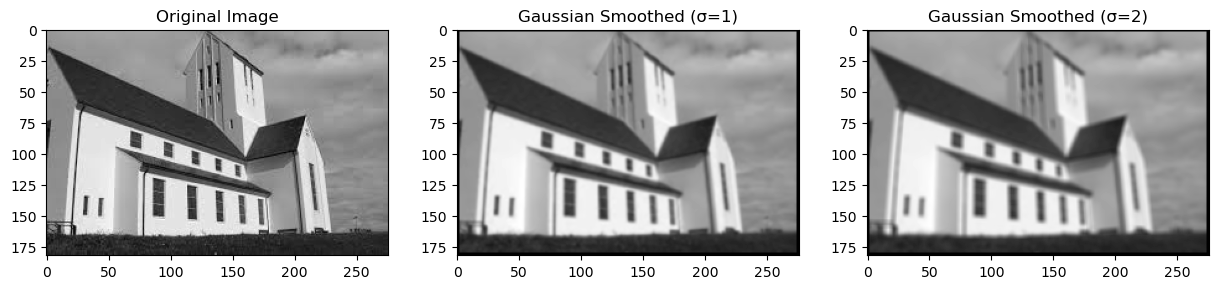

In [6]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(image1_filt1, cmap='gray')
plt.title('Gaussian Smoothed (σ=1)')

plt.subplot(1, 3, 3)
plt.imshow(image1_filt2, cmap='gray')
plt.title('Gaussian Smoothed (σ=2)')

plt.show()

# Step 2:

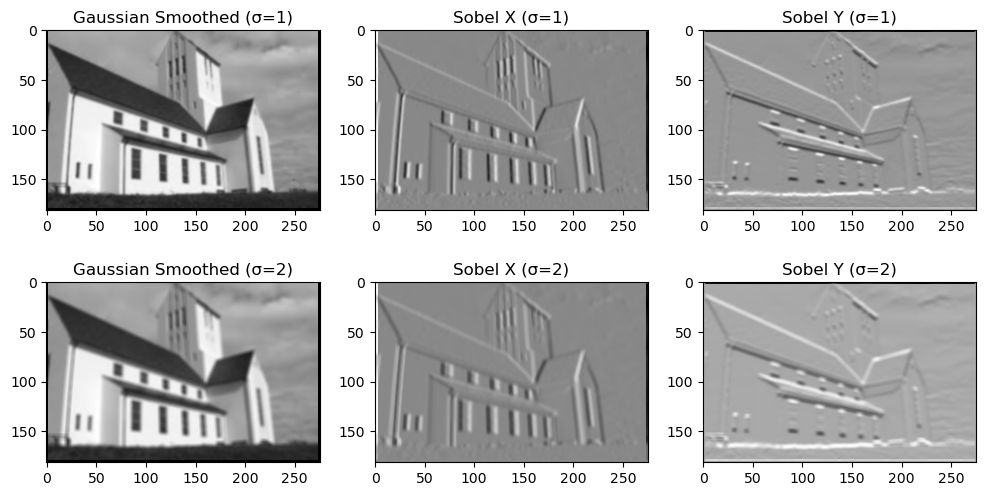

In [7]:
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

image1_filt1_sobel_x = convolution(image1_filt1, (1/8)*(sobel_x))
image1_filt1_sobel_y = convolution(image1_filt1, (1/8)*(sobel_y))

image1_filt2_sobel_x = convolution(image1_filt2, (1/8)*(sobel_x))
image1_filt2_sobel_y = convolution(image1_filt2, (1/8)*(sobel_y))

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(image1_filt1, cmap='gray')
plt.title('Gaussian Smoothed (σ=1)')

plt.subplot(2, 3, 2)
plt.imshow(image1_filt1_sobel_x, cmap='gray')
plt.title('Sobel X (σ=1)')

plt.subplot(2, 3, 3)
plt.imshow(image1_filt1_sobel_y, cmap='gray')
plt.title('Sobel Y (σ=1)')

plt.subplot(2, 3, 4)
plt.imshow(image1_filt2, cmap='gray')
plt.title('Gaussian Smoothed (σ=2)')

plt.subplot(2, 3, 5)
plt.imshow(image1_filt2_sobel_x, cmap='gray')
plt.title('Sobel X (σ=2)')

plt.subplot(2, 3, 6)
plt.imshow(image1_filt2_sobel_y, cmap='gray')
plt.title('Sobel Y (σ=2)')

plt.show()

# Step 3:

In [8]:
def deriv_gaussian_smoothing(size, sigma):
    #grid_size = size //2
    #x,y = np.mgrid[-grid_size:grid_size+1, -grid_size:grid_size+1]
    #gaussi_x = -(x/np.square(sigma))*(np.exp(-(np.square(x)+np.square(y))/(2*np.square(sigma))))
    #gaussi_y = -(y/np.square(sigma))*(np.exp(-(np.square(x)+np.square(y))/(2*np.square(sigma))))
    grid_size = size // 2
    x, y = np.mgrid[-grid_size:grid_size + 1, -grid_size:grid_size + 1]
    gaussi_x = -(x / (2 * np.pi * sigma**4)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    gaussi_y = -(y / (2 * np.pi * sigma**4)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return gaussi_x / np.sum(np.abs(gaussi_x)), gaussi_y / np.sum(np.abs(gaussi_y))
    #return gaussi_x, gaussi_y

Text(0.5, 1.0, 'Gaussian Derivative Y (σ=2)')

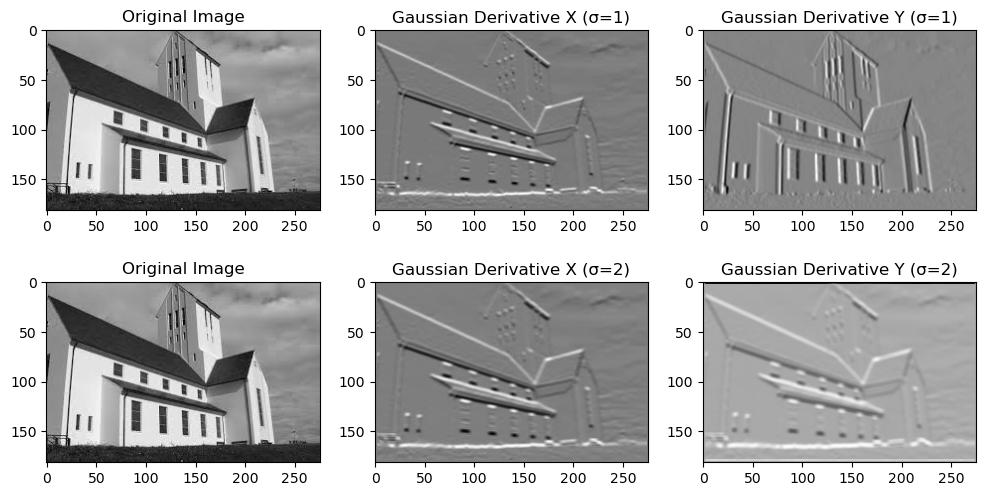

In [9]:
deriv_gausfilt1_x, deriv_gausfilt1_y = deriv_gaussian_smoothing(5,1)
image1_filt1_deriv_x = convolution(image1, deriv_gausfilt1_x)
image1_filt1_deriv_y = convolution(image1, deriv_gausfilt1_y)

deriv_gausfilt2_x, deriv_gausfilt2_y = deriv_gaussian_smoothing(5,2)
image1_filt2_deriv_x = convolution(image1, deriv_gausfilt2_x)
image1_filt2_deriv_y = convolution(image1, deriv_gausfilt2_y)


plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(image1_filt1_deriv_x, cmap='gray')
plt.title('Gaussian Derivative X (σ=1)')

plt.subplot(2, 3, 3)
plt.imshow(image1_filt1_deriv_y, cmap='gray')
plt.title('Gaussian Derivative Y (σ=1)')

plt.subplot(2, 3, 4)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 5)
plt.imshow(image1_filt2_deriv_x, cmap='gray')
plt.title('Gaussian Derivative X (σ=2)')

plt.subplot(2, 3, 6)
plt.imshow(image1_filt2_sobel_y, cmap='gray')
plt.title('Gaussian Derivative Y (σ=2)')

Based on my observation, the Derivative of Gaussian filtering is capable of doing both smoothing as well as edge detection on the image. By doing both in one step it allows to minimize the number of steps of smoothing and edge setecting separately.

# Part 2 - Corner Detection

In [10]:
# Step1: Colour to Grayscale
#Image already stored as grayscale
#image1 = cv2.imread("Harris-Corner-600x570.jpg", cv2.IMREAD_GRAYSCALE)
#image1 = image1.astype(np.float32) / 255.0

# Step 2: Spatial derivative calculation
deriv_gausfilt1_x, deriv_gausfilt1_y = deriv_gaussian_smoothing(5,1)
image1_filt1_deriv_x = convolution(image1, deriv_gausfilt1_x)
image1_filt1_deriv_y = convolution(image1, deriv_gausfilt1_y)

# Step 3: Structure tensor setup (M)
Ixx = np.square(image1_filt1_deriv_x)
Iyy = np.square(image1_filt1_deriv_y)
Ixy = image1_filt1_deriv_x * image1_filt1_deriv_y
# The structure tensor M should be a 3x3 matrix for each pixel
window_size = 3
Mxx = convolution(Ixx, np.ones((window_size, window_size)))
Myy = convolution(Iyy, np.ones((window_size, window_size)))
Mxy = convolution(Ixy, np.ones((window_size, window_size)))
M = np.array([[Mxx, Mxy],[Mxy, Myy]])

# Step 4: Corner response calculation
k = 0.04 #Assumption. K is empirical constant, usually 0.04-0.06
# calculate the determinant of a 2x2 matrix.
det_M = M[0, 0] * M[1, 1] - M[0, 1] * M[1, 0]
trace_M = M[0, 0] + M[1, 1]

# Calculate the corner response
response = det_M - k * (trace_M ** 2)

# Step 5: Non-maximum suppression
threshold=0.01
corners = np.zeros_like(response)
corners[response > threshold * response.max()] = 255

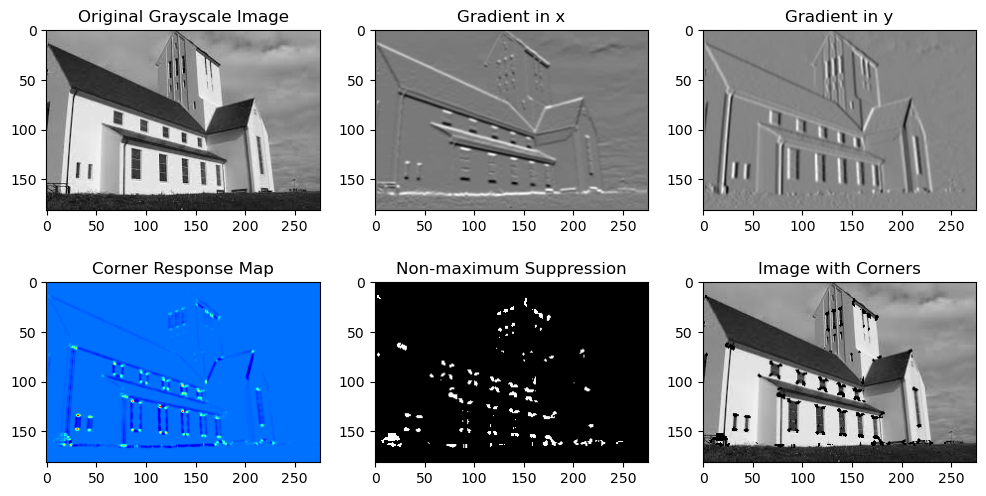

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(2, 3, 2)
plt.imshow(image1_filt1_deriv_x, cmap='gray')
plt.title('Gradient in x')

plt.subplot(2, 3, 3)
plt.imshow(image1_filt1_deriv_y, cmap='gray')
plt.title('Gradient in y')

plt.subplot(2, 3, 4)
plt.imshow(response, cmap='jet')
plt.title('Corner Response Map')

plt.subplot(2, 3, 5)
plt.imshow(corners, cmap='gray')
plt.title('Non-maximum Suppression')

image1 = cv2.cvtColor(image1, cv2.COLOR_GRAY2BGR)
image1[corners > 0] = [0]
plt.subplot(2, 3, 6)
plt.imshow(image1, cmap='gray')
plt.title('Image with Corners')

plt.show()